kNN: k-nearest neighbours classifier

In [188]:
import numpy as np
import random
import time

def distance(p1, p2):
    '''Returns the euclidean distance between two point in R(N)'''
    if p1.size != p2.size:
        print('Error: Vectors have different lengths')
        return
    
    return np.sqrt(np.sum(np.power(p1-p2,2)))

def majority_vote(votes):
    """Returns the label with the highest vote count. If there is a tie, winner is chosen at random"""
    vote_count = {}
    for v in votes:
        if v in vote_count:
            vote_count[v] += 1
        else:
            vote_count[v] = 1
    
    # want to find key with largest count
    # winner = list(x.keys())[list(x.values()).index(max(x.values()))]

    m = max(vote_count.values())
    winner = []
    for vote, count in vote_count.items():
        if count == m:
            winner.append(vote)
    
    return random.choice(winner)

import scipy.stats
def majority_vote_short(votes):
    mode, count = scipy.stats.mode(votes)
    return mode

In [189]:
def k_nearest(points, pt, k=5):
    '''Returns the indices of the k closest classified points to given unclassified points'''
    n_points = points.shape[0]
    
    d = np.zeros(n_points)
    for i in range(n_points):
        # compute distance between unknown point and other points
        d[i] = distance(points[i], pt)
    # return k nearest points and use to classify
    return  np.argsort(d)[:k]
    
def knn_predict(points, pt, pt_classes, k=5):
    '''Returns the class voted on by the k nearest neighbours'''
    # find indices of k nearest points
    ind = k_nearest(points, pt, k)
    # return majority class of those points
    return majority_vote(pt_classes[ind])
    
# points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
# points_classes = np.array([1,1,2,3,4,3,2,1,2])
# p = np.array([2.5, 2])

# k_neighbours = points[k_nearest(points, p, 4)]

# new_class = knn_predict(points, p, points_classes, 4)

# import matplotlib.pyplot as plt
# plt.figure()
# plt.plot(points[:,0], points[:,1],'.r')
# plt.plot(k_neighbours[:,0], k_neighbours[:,1], 'x')
# plt.plot(p[0],p[1],'.k')
# plt.show()

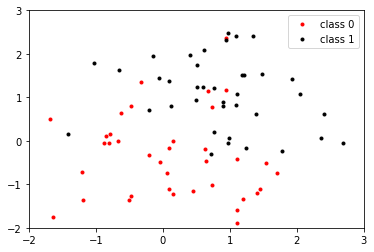

In [191]:
def gen_data(n=50):
    '''Generates n points (drawn from the normal distribution) and their classes.
    First class has mean 0, second class has mean 1'''
    points = np.concatenate((np.random.normal(0,1,[n,2]), np.random.normal(1,1,[n,2])), axis=0)
    classes = np.concatenate((np.repeat(0,n), np.repeat(1,n)))
    return (points, classes)

n = 40
(pts, classes) = gen_data(n)

plt.figure()
plt.plot(pts[:n,0], pts[:n,1], '.r', label='class 0')
plt.plot(pts[n:,0], pts[n:,1], '.k', label='class 1')
plt.legend()
plt.axis([-2, 3, -2, 3])
plt.show()

In [195]:
def make_prediction_grid(points, pt_classes, k, limits, h):
    '''Classifies each point on the prediction grid'''
    (xmin, xmax, ymin, ymax) = limits
    xs = np.arange(xmin, xmax, h)
    ys = np.arange(xmin, xmax, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            pt = np.array([x, y])
            prediction_grid[j, i] = knn_predict(points, pt, pt_classes, k)
            
    return (xx, yy, prediction_grid)

def plot_prediction_grid(xx, yy, prediction_grid):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))

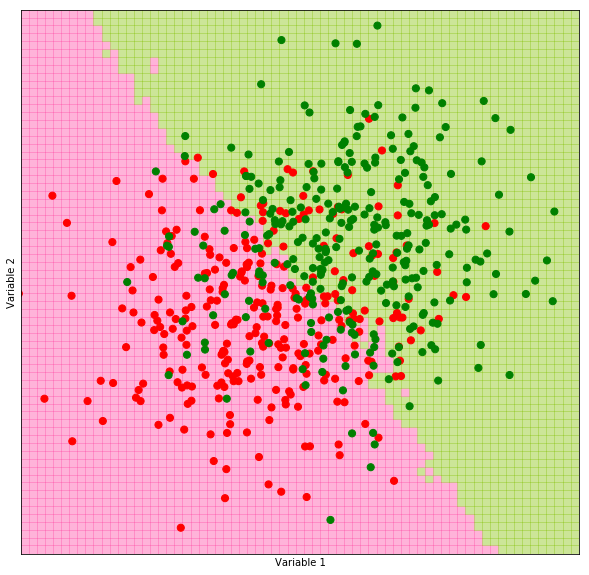

In [199]:
(predictors, outcomes) = gen_data(300)

k = 50
limits = (-3, 4, -3, 4)
h = 0.1

(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, k, limits, h)
plot_prediction_grid(xx, yy, prediction_grid)

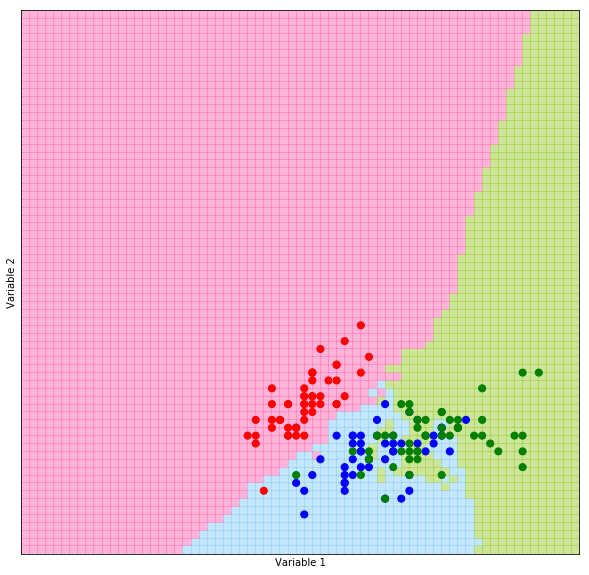

In [256]:
from sklearn import datasets

iris = datasets.load_iris
data = iris('data')[0]
predictors = data[:, 0:2] # only use first two features
outcomes = iris('data')[1]

# plt.plot(data[classes==0][:,0], data[classes==0][:,1], 'ro')
# plt.plot(data[classes==1][:,0], data[classes==1][:,1], 'bo')
# plt.plot(data[classes==2][:,0], data[classes==2][:,1], 'go')
# plt.show()

k = 5
limits = (1.5, 8.5, 1, 4)
h = 0.1

(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, k, limits, h)
plot_prediction_grid(xx, yy, prediction_grid)